<a href="https://colab.research.google.com/github/imhrishita/ML/blob/main/covid_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snds
import tensorflow as tf
from tensorflow import keras

In [70]:
from google.colab import files 
files.upload()

Saving covid.csv to covid (3).csv


{'covid.csv': b'type,name,o2 level,cpr,pcm,fabiflue,ijection,age\r\n1,ramesh,97,3,5,0,0,10\r\n0,suresh,99,0,2,0,0,19\r\n1,pankaj,80,12,10,2,0,39\r\n0,prakash,98,2,4,0,0,43\r\n1,rekha,90,4,7,0,0,25\r\n0,sapna,97,1,5,0,0,34\r\n1,diksha,86,1,6,2,0,37\r\n1,kalpana,99,3,3,2,0,45\r\n0,raju,99,0,2,0,0,72\r\n0,mahesh,98,0,4,0,0,39\r\n0,karan,99,0,6,0,0,49\r\n1,rajat,89,2,8,10,0,59\r\n0,siya,99,0,9,0,0,55\r\n0,lakhan,99,0,10,0,0,44\r\n1,shyam,98,1,3,8,0,33\r\n0,ramesh,99,0,5,0,0,22\r\n0,sita,99,0,5,0,0,46\r\n'}

In [73]:
df = pd.read_csv('covid (3).csv')
print(df)

    type     name  o2 level  cpr  pcm  fabiflue  ijection  age
0      1   ramesh        97    3    5         0         0   10
1      0   suresh        99    0    2         0         0   19
2      1   pankaj        80   12   10         2         0   39
3      0  prakash        98    2    4         0         0   43
4      1    rekha        90    4    7         0         0   25
5      0    sapna        97    1    5         0         0   34
6      1   diksha        86    1    6         2         0   37
7      1  kalpana        99    3    3         2         0   45
8      0     raju        99    0    2         0         0   72
9      0   mahesh        98    0    4         0         0   39
10     0    karan        99    0    6         0         0   49
11     1    rajat        89    2    8        10         0   59
12     0     siya        99    0    9         0         0   55
13     0   lakhan        99    0   10         0         0   44
14     1    shyam        98    1    3         8        

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      17 non-null     int64 
 1   name      17 non-null     object
 2   o2 level  17 non-null     int64 
 3   cpr       17 non-null     int64 
 4   pcm       17 non-null     int64 
 5   fabiflue  17 non-null     int64 
 6   ijection  17 non-null     int64 
 7   age       17 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 1.2+ KB


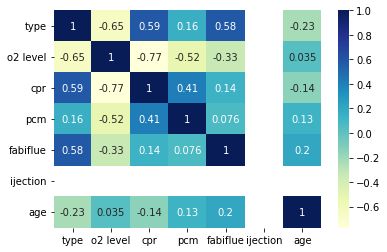

In [75]:
dataplot=snds.heatmap(df.corr(),cmap="YlGnBu",annot=True)

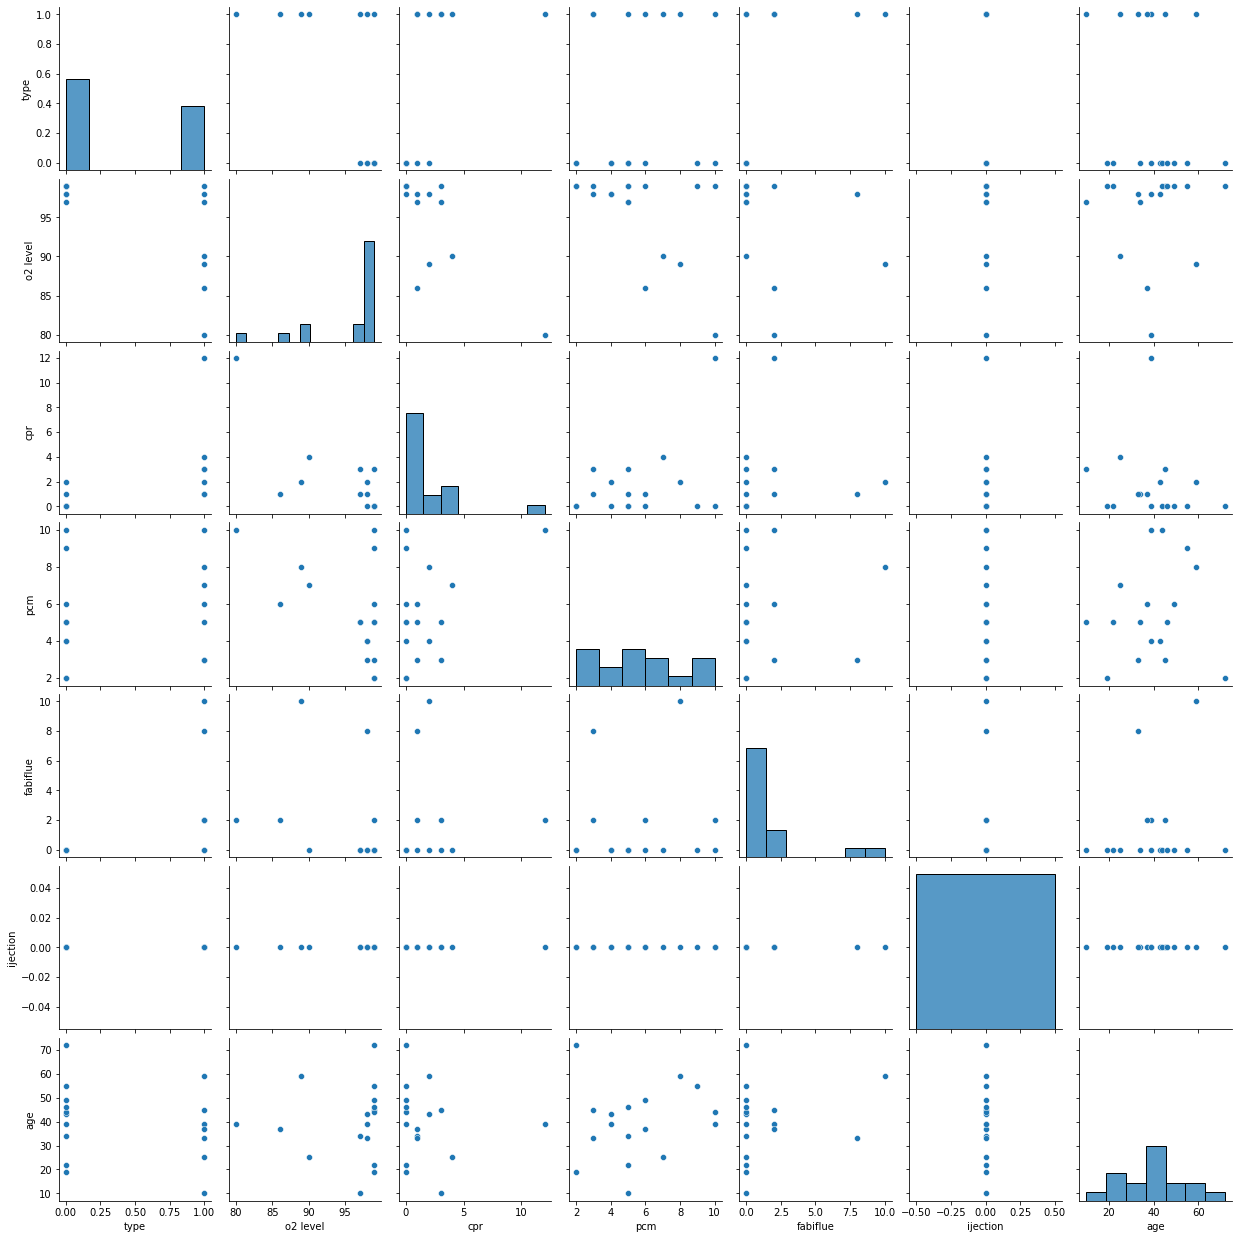

In [76]:
snds.pairplot(df)

In [77]:
df.pop('name')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   type      17 non-null     int64
 1   o2 level  17 non-null     int64
 2   cpr       17 non-null     int64
 3   pcm       17 non-null     int64
 4   fabiflue  17 non-null     int64
 5   ijection  17 non-null     int64
 6   age       17 non-null     int64
dtypes: int64(7)
memory usage: 1.1 KB


In [78]:
X=df.drop(['type'],axis=1).values
y=df['type'].values

In [79]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=23)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full, random_state=23)

In [80]:
X_train.shape, y_train.shape

((9, 6), (9,))

In [81]:
X_valid.shape, y_valid.shape

((3, 6), (3,))

In [82]:
X_test.shape, y_test.shape

((5, 6), (5,))

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [84]:
np.random.seed(23)
tf.random.set_seed(23)

In [125]:
inputs = keras.Input(shape=(6,))
x = keras.layers.Dense(50, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(2, activation="tanh", name="dense_3")(x)
outputs = keras.layers.Dense(1, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [126]:
model.compile(loss="hinge",
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=['accuracy'])

In [127]:
model_history=model.fit(X_train,y_train, epochs=200, validation_data=(X_valid, y_valid))

Epoch 1/200
1/1 [==============================] - 1s 540ms/step - loss: 0.8878 - accuracy: 0.7778 - val_loss: 1.8848 - val_accuracy: 0.3333
Epoch 2/200
1/1 [==============================] - 0s 23ms/step - loss: 0.8678 - accuracy: 0.7778 - val_loss: 1.8716 - val_accuracy: 0.3333
Epoch 3/200
1/1 [==============================] - 0s 25ms/step - loss: 0.8480 - accuracy: 0.7778 - val_loss: 1.8584 - val_accuracy: 0.3333
Epoch 4/200
1/1 [==============================] - 0s 26ms/step - loss: 0.8284 - accuracy: 0.7778 - val_loss: 1.8450 - val_accuracy: 0.3333
Epoch 5/200
1/1 [==============================] - 0s 24ms/step - loss: 0.8091 - accuracy: 0.7778 - val_loss: 1.8314 - val_accuracy: 0.3333
Epoch 6/200
1/1 [==============================] - 0s 25ms/step - loss: 0.7901 - accuracy: 0.7778 - val_loss: 1.8176 - val_accuracy: 0.3333
Epoch 7/200
1/1 [==============================] - 0s 26ms/step - loss: 0.7723 - accuracy: 0.7778 - val_loss: 1.7970 - val_accuracy: 0.3333
Epoch 8/200
1/1 [==

In [128]:
test=model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.2246 - accuracy: 0.8000


In [129]:
model_history.history

{'accuracy': [0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544,
  0.7777777910232544

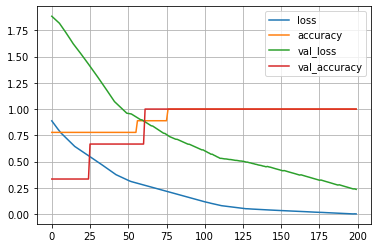

In [130]:
pd.DataFrame(model_history.history).plot(kind='line')
plt.grid(True)
plt.show()

In [131]:
y_predict=model.predict(X_test)
y_predict,y_test.round(4)

(array([[-0.12316413],
        [-1.5006558 ],
        [ 2.1109114 ],
        [-1.9232838 ],
        [ 1.0450026 ]], dtype=float32), array([1, 0, 1, 0, 1]))